# LIDA - Automatic Generation of Visualizations using Large Language Models

LIDA is a library for generating data visualizations. LIDA will work with any programming language and visualization libraries (e.g. matplotlib, seaborn, altair, d3 etc) and works with multiple large language model providers (OpenAI, PaLM, Cohere, Huggingface). 


In [1]:
!pip install lida 


In [2]:
from lida import Manager, TextGenerationConfig , llm  
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv')
df.head(10)

,Name,Type,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,Horsepower(HP),City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,Sedan,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,Sedan,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,SUV,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,Sports Car,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,Sedan,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
5,Acura TL 4dr,Sedan,0,0,33195,30299,3.2,6,270,20,28,3575,108,186,72
6,Acura TSX 4dr,Sedan,0,0,26990,24647,2.4,4,200,22,29,3230,105,183,69
7,Audi A4 1.8T 4dr,Sedan,0,0,25940,23508,1.8,4,170,22,31,3252,104,179,70
8,Audi A4 3.0 4dr,Sedan,0,0,31840,28846,3.0,0,220,20,28,3462,104,179,70
9,Audi A4 3.0 convertible 2dr,Sedan,0,0,42490,38325,3.0,6,220,20,27,3814,105,180,70


## Summarize Data, Generate Goals

In [4]:
# Replace API_KEY with API key provided by OpenAI
lida = Manager(text_gen = llm("openai", api_key='API_KEY'))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo-0301", use_cache=True)

summary = lida.summarize("https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv", 
                         summary_method="default", 
                         textgen_config=textgen_config)  
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** Which car models have the highest retail price?

**Visualization:** `Bar chart of Name vs Retail_Price`

**Rationale:** This visualization will help our data analyst persona identify the car models with the highest retail prices. By comparing the bar heights, they can easily determine which models have the highest and lowest retail prices, and use this information to make informed decisions about which models to analyze further.



### Goal 1
---
**Question:** What is the relationship between engine size and horsepower?

**Visualization:** `Scatter plot of Engine_Size__l_ vs Horsepower_HP_`

**Rationale:** This visualization will help our data analyst persona understand the relationship between engine size and horsepower. By plotting these variables on a scatter plot, they can easily see if there is a correlation between the two, and if so, whether it is positive or negative. This information can be used to inform decisions about which car models to focus on for further analysis, based on their engine size and horsepower characteristics.


In [5]:
# goals can also be based on a persona 
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=2, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the relationship between Retail Price and City Miles per Gallon?

**Visualization:** `scatter plot of Retail Price vs City Miles per Gallon`

**Rationale:** This visualization will help the mechanic identify cars that are both cheap and fuel-efficient. By plotting the Retail Price against the City Miles per Gallon, we can see which cars offer the best value for the mechanic's needs. We can also identify any outliers or patterns in the data that may be of interest.



### Goal 1
---
**Question:** What is the distribution of Engine Size by Type of car?

**Visualization:** `box plot of Engine Size by Type`

**Rationale:** This visualization will help the mechanic understand the distribution of Engine Size across different types of cars. By using a box plot, we can easily see the median, range, and outliers for each type of car. This will help the mechanic identify which types of cars have the largest and smallest engines, and whether there are any notable differences in the distribution of Engine Size across different types of cars.


## Generate Visualizations

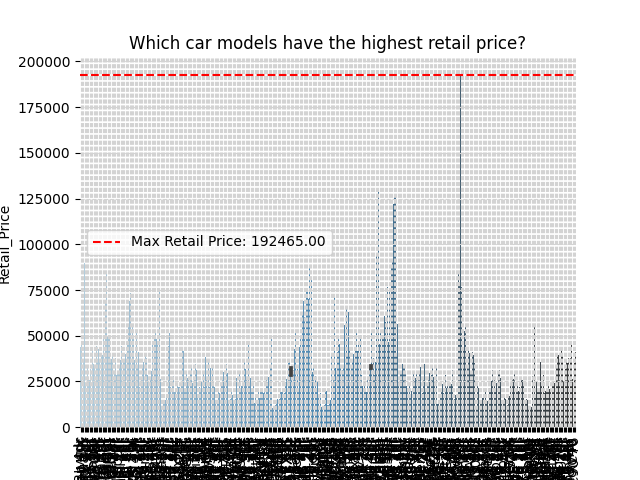

In [6]:
i = 0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
charts[0]

### Generate visualization via a "user query"   

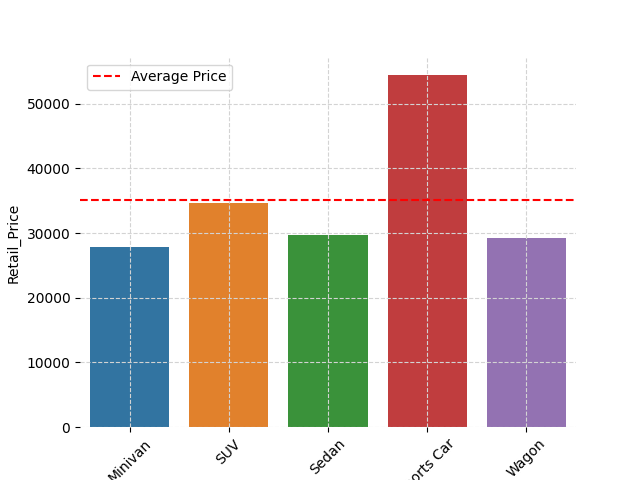

In [7]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  
charts[0]

### Write generated code to file 

In [8]:
with open('lida-chart.py', 'w') as fout:
    fout.write(charts[0].code)


# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation. 

This includes 
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement 

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

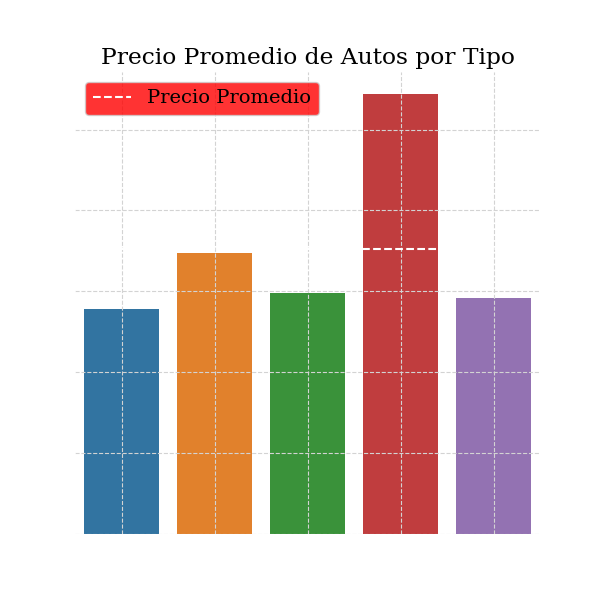

In [9]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)

instructions = ["make the chart height and width equal", 
                "change the color of the chart to red", 
                "translate the chart to spanish"]

edited_charts = lida.edit(code=code,  
                          summary=summary, 
                          instructions=instructions, 
                          library=library, 
                          textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [10]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"], "\n\n")

accessibility  **  The goal of the chart is to visualize the average retail price of different types of products. The chart is a barplot with the x-axis representing the product types and the y-axis representing the average retail price. The chart also includes a horizontal line representing the average price across all product types. 


transformation  **  This section of the code groups the data by product type and calculates the mean retail price for each group. The resulting data is stored in a new dataframe called grouped_data. 


visualization  **  This section of the code creates the barplot using the seaborn library. The x-axis represents the product types and the y-axis represents the average retail price. A horizontal line is added to the chart to represent the average price across all product types. A legend is added to the chart to indicate the meaning of the horizontal line. Finally, the x-axis labels are rotated by 45 degrees for better readability. 




## Visualization Recommendation

In [12]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

Recommended 2 charts


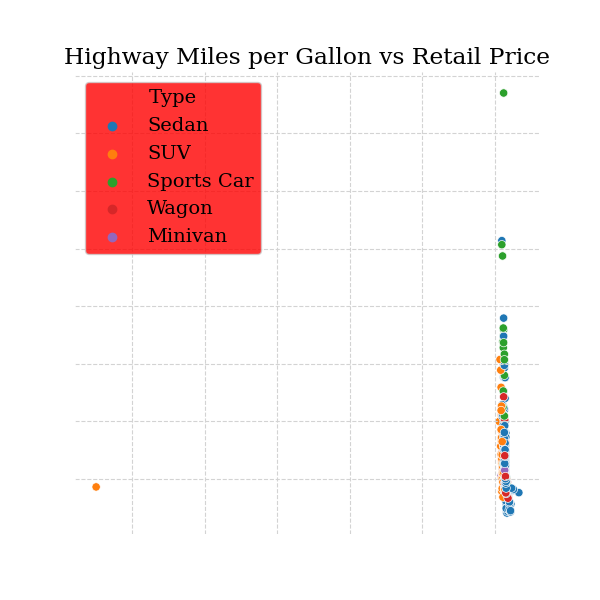

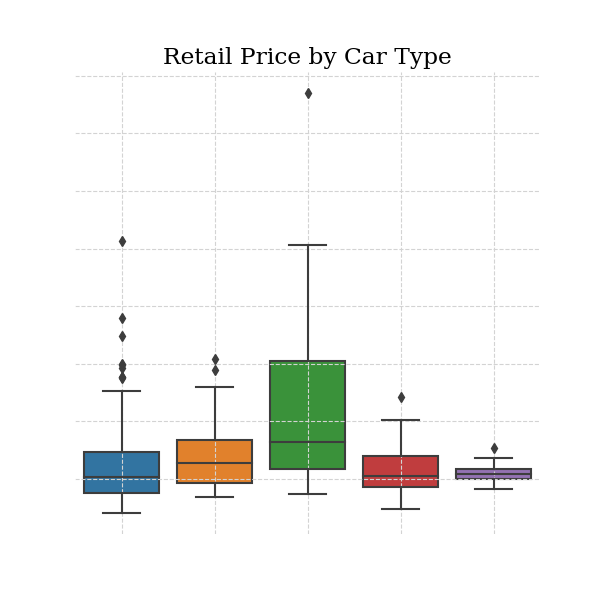

In [13]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart) 